In [1]:
%matplotlib inline
import pandas as pd


In [2]:
train = pd.read_csv('03_santander_train.csv', index_col='ID')

In [3]:
train.head()

train_y = train['TARGET']
train = train.drop('TARGET',axis=1)


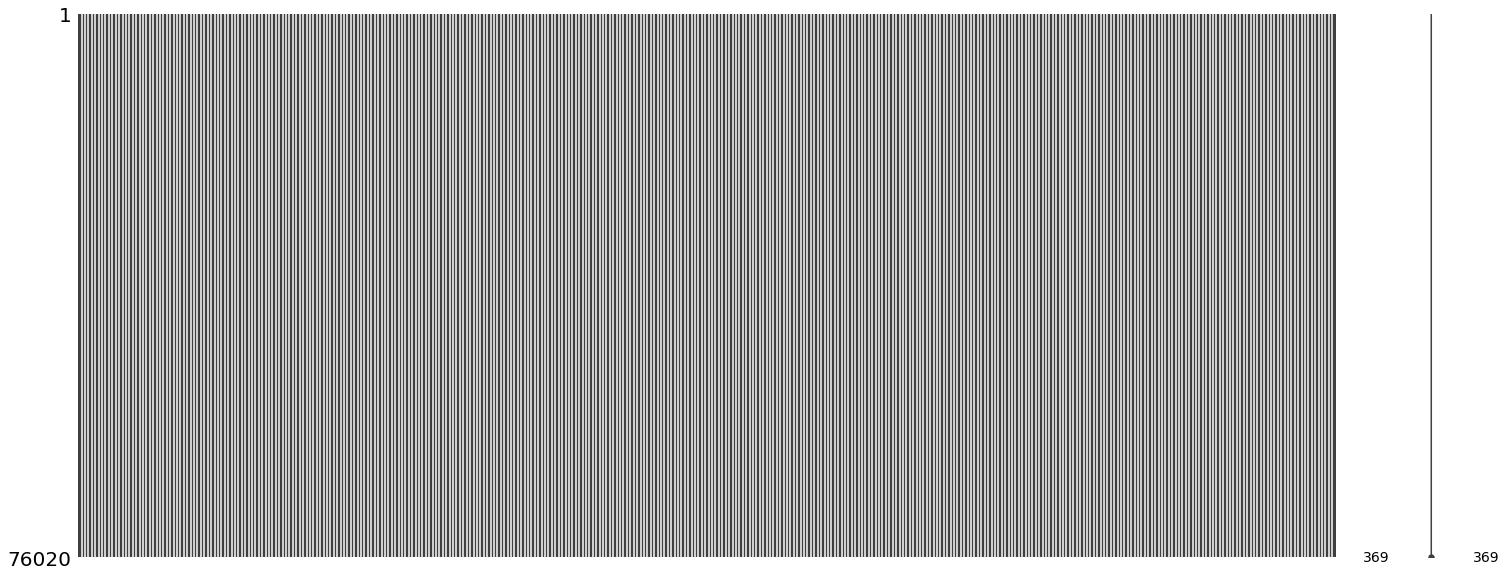

In [4]:
# var38

import missingno as msno

msno.matrix(train, sort='ascending')

In [5]:
test = pd.read_csv('03_santander_test.csv', index_col='ID')
test = test[train.columns]
#msno.matrix(test, sort='ascending')

In [6]:
y = list(train_y)

In [7]:
train.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Data columns (total 369 columns):
var3                             76020 non-null int64
var15                            76020 non-null int64
imp_ent_var16_ult1               76020 non-null float64
imp_op_var39_comer_ult1          76020 non-null float64
imp_op_var39_comer_ult3          76020 non-null float64
imp_op_var40_comer_ult1          76020 non-null float64
imp_op_var40_comer_ult3          76020 non-null float64
imp_op_var40_efect_ult1          76020 non-null float64
imp_op_var40_efect_ult3          76020 non-null float64
imp_op_var40_ult1                76020 non-null float64
imp_op_var41_comer_ult1          76020 non-null float64
imp_op_var41_comer_ult3          76020 non-null float64
imp_op_var41_efect_ult1          76020 non-null float64
imp_op_var41_efect_ult3          76020 non-null float64
imp_op_var41_ult1                76020 non-null float64
imp_op_var39_efect_ult1          76020 non-null float

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
from matplotlib import pyplot as plt 
from tqdm import tqdm 

100%|██████████| 14/14 [00:15<00:00,  1.08s/it]


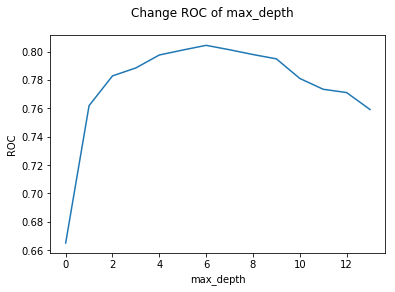

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve

y_res = []
x_res = []
for i in tqdm(range(14)):
    dtc = DecisionTreeClassifier(max_depth=i+1)
    dtc.fit(X_train, y_train)
    predict = dtc.predict_proba(X_test)
    roc = roc_auc_score(y_test, predict[:,1])
    
    x_res.append(i)
    y_res.append(roc)
    
fig = plt.figure()
fig.suptitle('Change ROC of max_depth')
plt.xlabel('max_depth')
plt.ylabel('ROC')    
plt.plot(x_res,y_res)    

In [13]:
X_train_n = X_train.iloc[:,0:3]
X_test_n  = X_test.iloc[:,0:3]
#

100%|██████████| 8/8 [00:37<00:00,  4.69s/it]


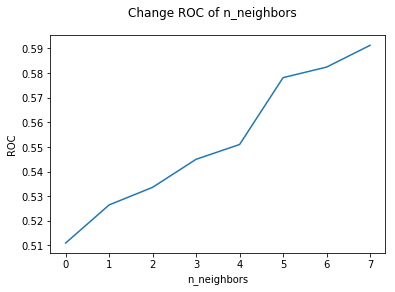

In [14]:
 
y_res = []
x_res = []
for i in tqdm(range(8)):
    dtc = KNeighborsClassifier(n_neighbors=i+1) 
    dtc.fit(X_train_n, y_train)
    predict = dtc.predict_proba(X_test_n)
    roc = roc_auc_score(y_test, predict[:,1])
    
    x_res.append(i)
    y_res.append(roc)
    
fig = plt.figure()
fig.suptitle('Change ROC of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('ROC')    
plt.plot(x_res,y_res) 

100%|██████████| 6/6 [00:12<00:00,  2.11s/it]


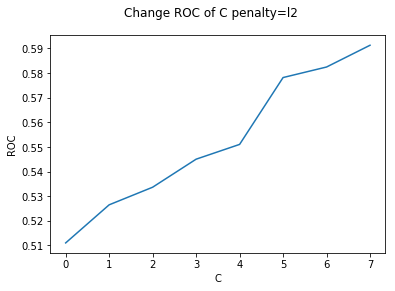

In [15]:

    
res_x = []
res_y = []

for i in tqdm(range(6)):  
    loc = LogisticRegression(C=(i+1)*10)
    loc.fit(X_train,y_train)
    predict = loc.predict_proba(X_test)
    roc = roc_auc_score(y_test, predict[:,1])
    res_x.append(i)
    res_y.append(roc) 
    
fig = plt.figure()
fig.suptitle('Change ROC of C penalty=l2 ')
plt.xlabel('C')
plt.ylabel('ROC')    
plt.plot(x_res,y_res)   

100%|██████████| 6/6 [00:01<00:00,  5.81it/s]


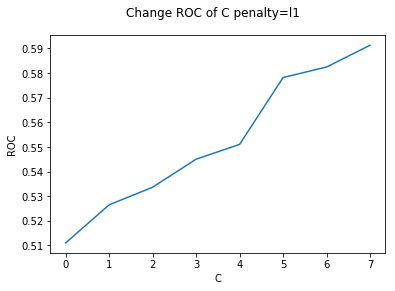

In [18]:


res_x = []
res_y = []

for i in tqdm(range(6)):   
    loc = LogisticRegression(C=(i+1)*10, penalty='l1')
    loc.fit(X_train_n,y_train)
    predict = loc.predict_proba(X_test_n)
    roc = roc_auc_score(y_test, predict[:,1])
    res_x.append(i)
    res_y.append(roc) 
    
fig = plt.figure()
fig.suptitle('Change ROC of C penalty=l1')
plt.xlabel('C')
plt.ylabel('ROC')    
plt.plot(x_res,y_res) 